# **Tecnológico de Costa Rica**

![TEC](https://www.eslared.net/sites/default/files/2020-06/tec_logo.png)


***IC-4213 / Inteligencia artificial***

Autores


*   **Sebastian Matey Rodriguez**
*   **Liz Iveth Salazar Salazar**
*   **Roosevelt Alejandro Pérez González**

#Análisis del Problema

La predicción del precio de una casa es un problema de regresión que busca estimar un valor numérico en función de diversas características de la propiedad, como el tamaño, la ubicación, el número de habitaciones, y otros factores. Para abordar este desafío, se utiliza el algoritmo de Random Forest, que es un modelo basado en árboles de decisión. Random Forest es especialmente adecuado para este tipo de problemas porque puede manejar tanto relaciones lineales como no lineales entre las características, y es robusto frente a valores atípicos y overfitting debido a su naturaleza de ensamble.


# Entendimiento de los Datos

## Carga de los datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = "/content/properties_2017.csv"
df = pd.read_csv(file_path)
df.head

/tmp/ipython-input-2596691391.py:8: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<bound method NDFrame.head of        parcelid  airconditioningtypeid  architecturalstyletypeid  \
0      10754147                    NaN                       NaN   
1      10759547                    NaN                       NaN   
2      10843547                    NaN                       NaN   
3      10859147                    NaN                       NaN   
4      10879947                    NaN                       NaN   
...         ...                    ...                       ...   
52859  12609223                    NaN                       NaN   
52860  12609530                    NaN                       NaN   
52861  12609576                    NaN                       NaN   
52862  12609676                    NaN                       NaN   
52863  12609699                    NaN                       NaN   

       basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
0               NaN          0.0         0.0                  NaN   
1               NaN          0.0         0.0                  NaN   
2               NaN          0.0         0.0                  5.0   
3               NaN          0.0         0.0                  3.0   
4               NaN          0.0         0.0                  4.0   
...             ...          ...         ...                  ...   
52859           NaN          2.0         3.0                  NaN   
52860           NaN          2.0         4.0                  NaN   
52861           NaN          2.0         2.0                  NaN   
52862           NaN          1.0         2.0                  NaN   
52863           NaN          2.0         4.0                  NaN   

       buildingqualitytypeid  calculatedbathnbr  decktypeid  ...  \
0                        NaN                NaN         NaN  ...   
1                        NaN                NaN         NaN  ...   
2                        NaN                NaN         NaN  ...   
3                        6.0                NaN         NaN  ...   
4                        NaN                NaN         NaN  ...   
...                      ...                ...         ...  ...   
52859                    8.0                2.0         NaN  ...   
52860                    4.0                2.0         NaN  ...   
52861                    9.0                2.0         NaN  ...   
52862                    5.0                1.0         NaN  ...   
52863                    8.0                2.0         NaN  ...   

       numberofstories  fireplaceflag  structuretaxvaluedollarcnt  \
0                  NaN            NaN                         NaN   
1                  NaN            NaN                         NaN   
2                  1.0            NaN                    660680.0   
3                  1.0            NaN                    580059.0   
4                  1.0            NaN                    196751.0   
...                ...            ...                         ...   
52859              NaN            NaN                     44527.0   
52860              NaN            NaN                    118895.0   
52861              NaN            NaN                    230728.0   
52862              NaN            NaN                     87654.0   
52863              NaN            NaN                         NaN   

       taxvaluedollarcnt  assessmentyear  landtaxvaluedollarcnt  taxamount  \
0                    9.0          2016.0                    9.0        NaN   
1                27516.0          2015.0                27516.0        NaN   
2              1434941.0          2016.0               774261.0   20800.37   
3              1174475.0          2016.0               594416.0   14557.57   
4               440101.0          2016.0               243350.0    5725.17   
...                  ...             ...                    ...        ...   
52859           127118.0          2016.0                82591.0    1688.51   
52860           347614.0          2016.0              

#Exploración de los datos

## Analisis de los datos

In [3]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52864 entries, 0 to 52863
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52864 non-null  int64  
 1   airconditioningtypeid         14601 non-null  float64
 2   architecturalstyletypeid      98 non-null     float64
 3   basementsqft                  30 non-null     float64
 4   bathroomcnt                   52864 non-null  float64
 5   bedroomcnt                    52864 non-null  float64
 6   buildingclasstypeid           258 non-null    float64
 7   buildingqualitytypeid         35892 non-null  float64
 8   calculatedbathnbr             50743 non-null  float64
 9   decktypeid                    340 non-null    float64
 10  finishedfloor1squarefeet      3931 non-null   float64
 11  calculatedfinishedsquarefeet  52156 non-null  float64
 12  finishedsquarefeet12          48084 non-null  float64
 13  f

In [4]:
df.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,5.286400e+04,14601.000000,98.000000,30.000000,52864.000000,52864.000000,258.000000,35892.000000,50743.000000,340.0,...,48.000000,52110.000000,11224.000000,5.199900e+04,5.224800e+04,52863.000000,5.182200e+04,5.251800e+04,1053.000000,5.145200e+04
mean,1.326137e+07,1.838162,7.244898,582.133333,2.214097,3.080698,3.782946,6.272958,2.305766,66.0,...,274.520833,1963.533525,1.393175,1.788678e+05,4.425620e+05,2015.998316,2.667213e+05,5.404870e+03,13.923077,6.048131e+13
std,8.121862e+06,2.984923,2.134939,377.238124,1.098487,1.284654,0.474424,1.735617,1.021994,0.0,...,283.313374,23.706173,0.532464,3.922585e+05,6.878544e+05,0.072890,4.283802e+05,8.949043e+03,1.523819,2.075728e+11
min,1.071177e+07,1.000000,2.000000,63.000000,0.000000,0.000000,1.000000,1.000000,1.000000,66.0,...,14.000000,1862.000000,1.000000,5.000000e+00,8.000000e+00,2003.000000,4.000000e+00,8.300000e+00,6.000000,6.037101e+13
25%,1.156614e+07,1.000000,7.000000,221.000000,2.000000,2.000000,4.000000,5.000000,2.000000,66.0,...,99.000000,1949.000000,1.000000,7.786600e+04,1.853618e+05,2016.000000,7.714650e+04,2.445007e+03,14.000000,6.037301e+13
50%,1.239429e+07,1.000000,7.000000,547.000000,2.000000,3.000000,4.000000,6.000000,2.000000,66.0,...,196.000000,1962.000000,1.000000,1.274490e+05,3.183090e+05,2016.000000,1.743640e+05,3.979780e+03,14.000000,6.037555e+13
75%,1.402417e+07,1.000000,7.000000,721.500000,3.000000,4.000000,4.000000,8.000000,3.000000,66.0,...,330.000000,1981.000000,2.000000,2.037105e+05,5.110000e+05,2016.000000,3.237205e+05,6.182485e+03,15.000000,6.059032e+13
max,1.696019e+08,13.000000,21.000000,1572.000000,20.000000,25.000000,5.000000,12.000000,20.000000,66.0,...,1320.000000,2016.000000,4.000000,6.640493e+07,6.750649e+07,2016.000000,2.210127e+07,1.195296e+06,15.000000,6.111009e+13


El conjunto de datos tiene **2,985,217 filas** y **58 columnas**. La mayoría de las columnas son numéricas (`float64`), con algunas categóricas (`object`). Existen varios valores faltantes, especialmente en características como `airconditioningtypeid` y `architecturalstyletypeid`. El dataset incluye información sobre el tamaño de las propiedades, número de habitaciones, valor fiscal (`taxvaluedollarcnt`) y coordenadas geográficas (latitud y longitud). Es adecuado para predecir el valor de las propiedades, pero necesita preprocesamiento para manejar los valores faltantes y convertir las variables categóricas.


In [5]:
# Verificar la cantidad de valores nulos en cada columna
print("Missing values in Dataset:")
print(df.isnull().sum())

Missing values in Dataset:
parcelid                            0
airconditioningtypeid           38263
architecturalstyletypeid        52766
basementsqft                    52834
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             52606
buildingqualitytypeid           16972
calculatedbathnbr                2121
decktypeid                      52524
finishedfloor1squarefeet        48933
calculatedfinishedsquarefeet      708
finishedsquarefeet12             4780
finishedsquarefeet13            52706
finishedsquarefeet15            49273
finishedsquarefeet50            48933
finishedsquarefeet6             52541
fips                                0
fireplacecnt                    47528
fullbathcnt                      2121
garagecarcnt                    38546
garagetotalsqft                 38546
hashottuborspa                  52103
heatingorsystemtypeid           18588
latitude                            0
longitude              

El conjunto de datos presenta una cantidad significativa de valores faltantes en varias columnas. Algunas de las columnas más afectadas incluyen:

airconditioningtypeid, architecturalstyletypeid, basementsqft, decktypeid, y otras características relacionadas con la propiedad, que tienen más de 2 millones de valores faltantes.

bathroomcnt, bedroomcnt, fips, y otras, tienen algunos valores faltantes (menos de 3,000), lo que es manejable.

Algunas columnas con valores faltantes son categóricas como hashottuborspa, propertycountylandusecode, y propertyzoningdesc, las cuales necesitarán un tratamiento adecuado para imputar los valores o decidir si se eliminan.

Esto sugiere que el preprocesamiento es esencial para manejar estos valores faltantes, ya sea eliminando las columnas más afectadas o imputando los valores faltantes, dependiendo de la naturaleza de los datos.

In [6]:
# Verificar duplicados
print(f"Duplicados en el dataset: {df.duplicated().sum()}")


Duplicados en el dataset: 0


## Distribuciones

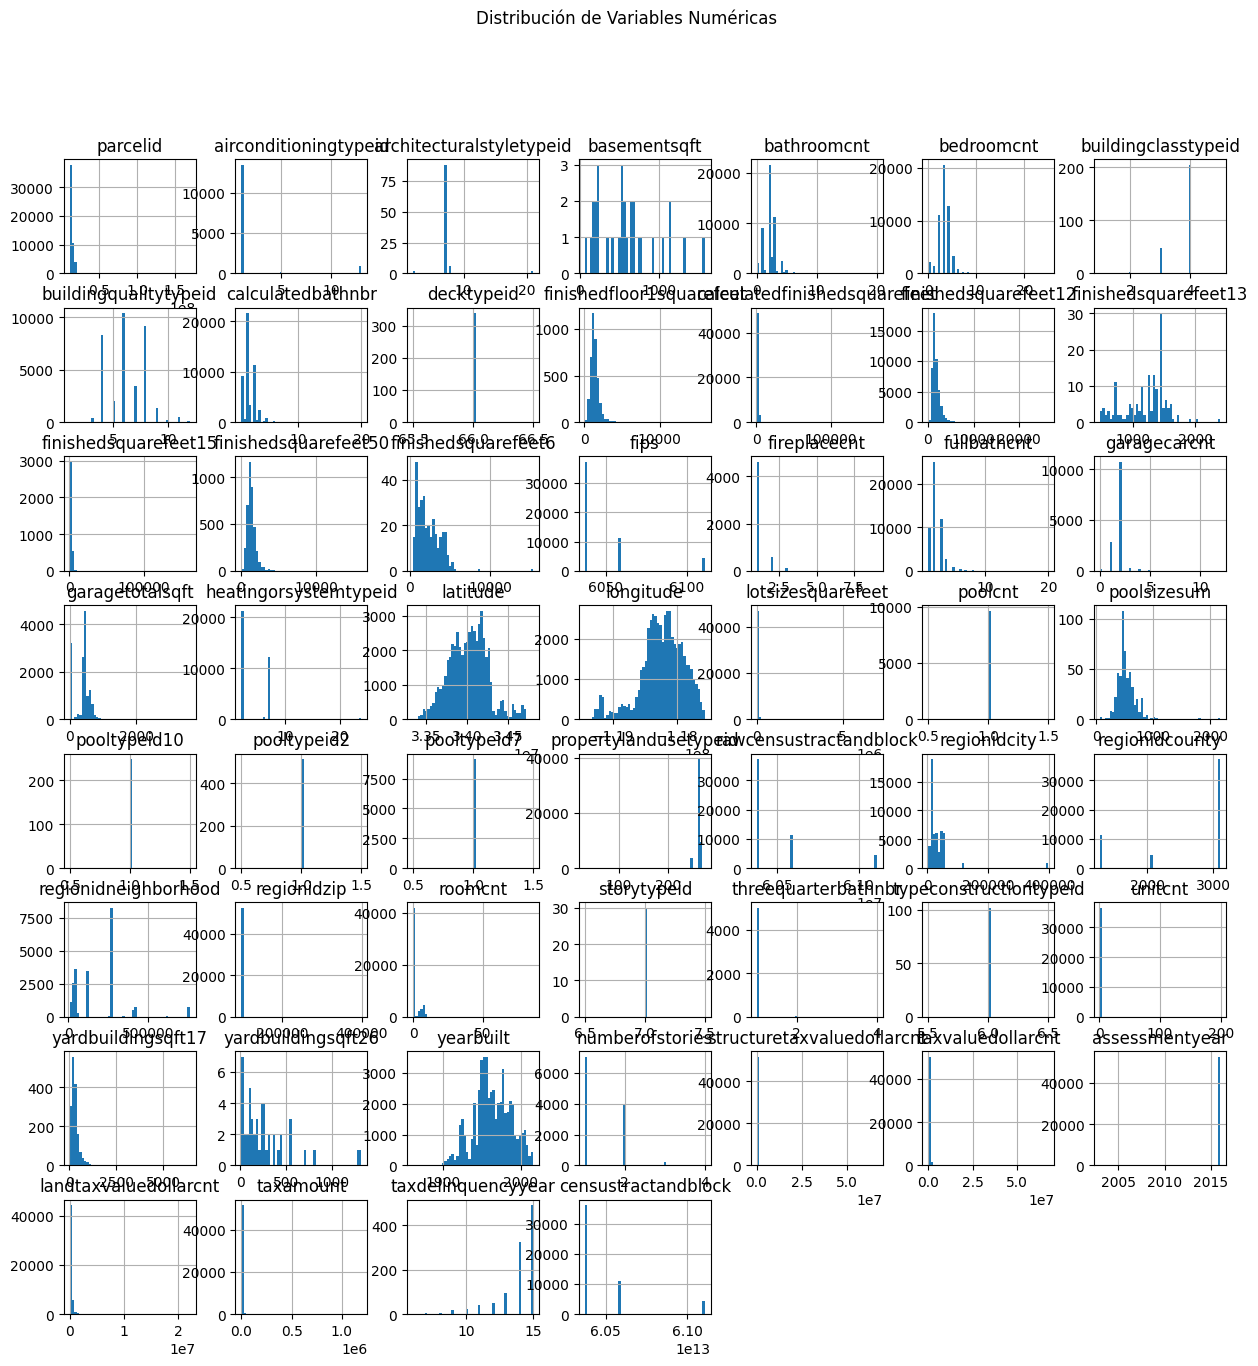

In [7]:
# Histograma de todas las variables numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.hist(figsize=(15, 15), bins=50)
plt.suptitle("Distribución de Variables Numéricas")
plt.show()

La visualización de la distribución de las variables numéricas muestra que varias de ellas, como `bathroomcnt`, `bedroomcnt`, `finishedsquarefeet`, y `taxvaluedollarcnt`, tienen distribuciones sesgadas, con picos en valores bajos y colas largas hacia los valores más altos, lo que indica que muchas propiedades comparten características comunes, mientras que algunas pocas tienen valores extremadamente altos. También se observan varios valores atípicos en columnas como `finishedsquarefeet`, `poolcnt`, y `taxvaluedollarcnt`, los cuales podrían influir en el modelo si no se manejan adecuadamente. Además, algunas columnas presentan distribuciones poco informativas, como `parcelid` o `regionidcity`, con valores repetidos o extremadamente altos, lo que podría sugerir errores de datos o variables no relevantes para el análisis.


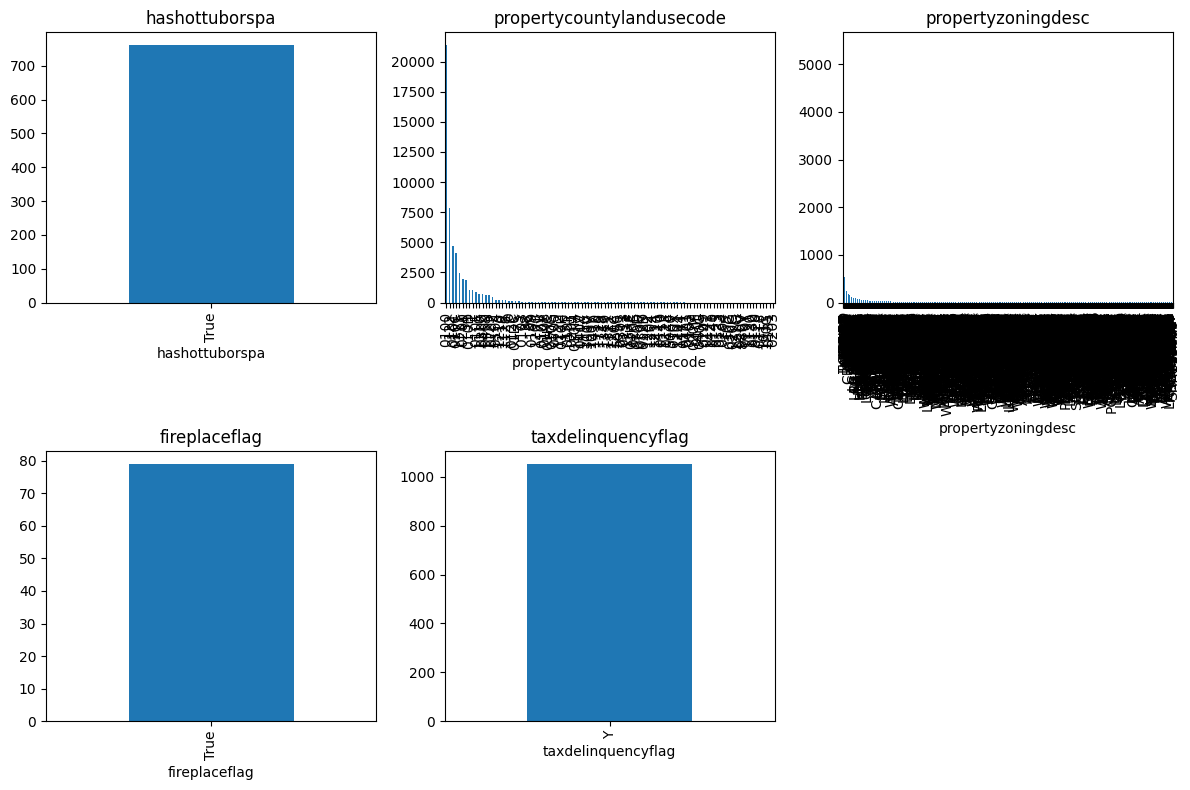

In [8]:
# Gráfico de barras para variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    df[col].value_counts().plot(kind='bar', title=col)
    plt.tight_layout()
plt.show()

La visualización de las variables categóricas muestra que algunas columnas, como `hashottuborspa`, `fireplaceflag`, y `taxdelinquencyflag`, tienen una distribución muy sesgada, donde la mayoría de los registros corresponden a un solo valor (por ejemplo, la mayoría de las propiedades tienen "True" en estas columnas). En contraste, las columnas `propertycountylandusecode` y `propertyzoningdesc` muestran distribuciones extremadamente desbalanceadas, con la mayoría de los valores agrupados en un pequeño número de categorías, lo que podría indicar una gran cantidad de datos faltantes o valores no representativos. Esto sugiere que algunas de estas columnas podrían no ser útiles para el modelo, y otras tal vez necesiten un tratamiento especial para manejar los valores faltantes o las distribuciones desbalanceadas.


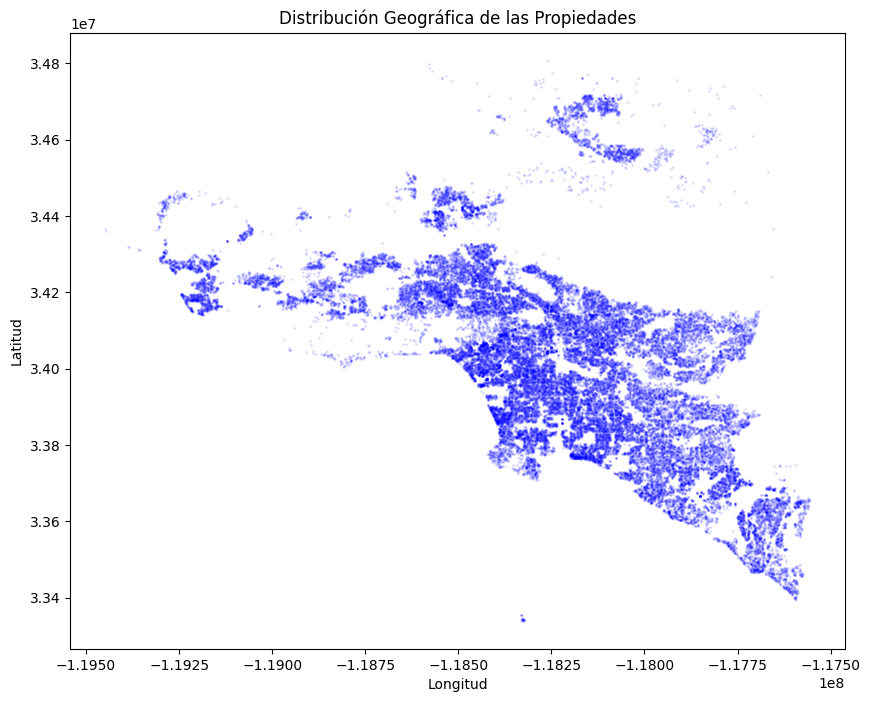

In [9]:
# Distribución geográfica de las propiedades
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], alpha=0.1, s=1, color='blue')
plt.title("Distribución Geográfica de las Propiedades")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

La visualización de la **distribución geográfica** de las propiedades muestra un mapa de las ubicaciones de las propiedades en función de sus coordenadas de **latitud** y **longitud**. Los puntos están dispersos principalmente en ciertas áreas, lo que sugiere que las propiedades están concentradas en algunas regiones específicas. La distribución parece estar centrada en zonas urbanas o áreas de interés, mientras que algunas regiones más alejadas tienen una menor densidad de propiedades. Esto puede indicar áreas con una mayor concentración de viviendas, lo cual es útil para el análisis de patrones espaciales y podría influir en la predicción de precios, dependiendo de la localización geográfica.


## Matriz de correlación

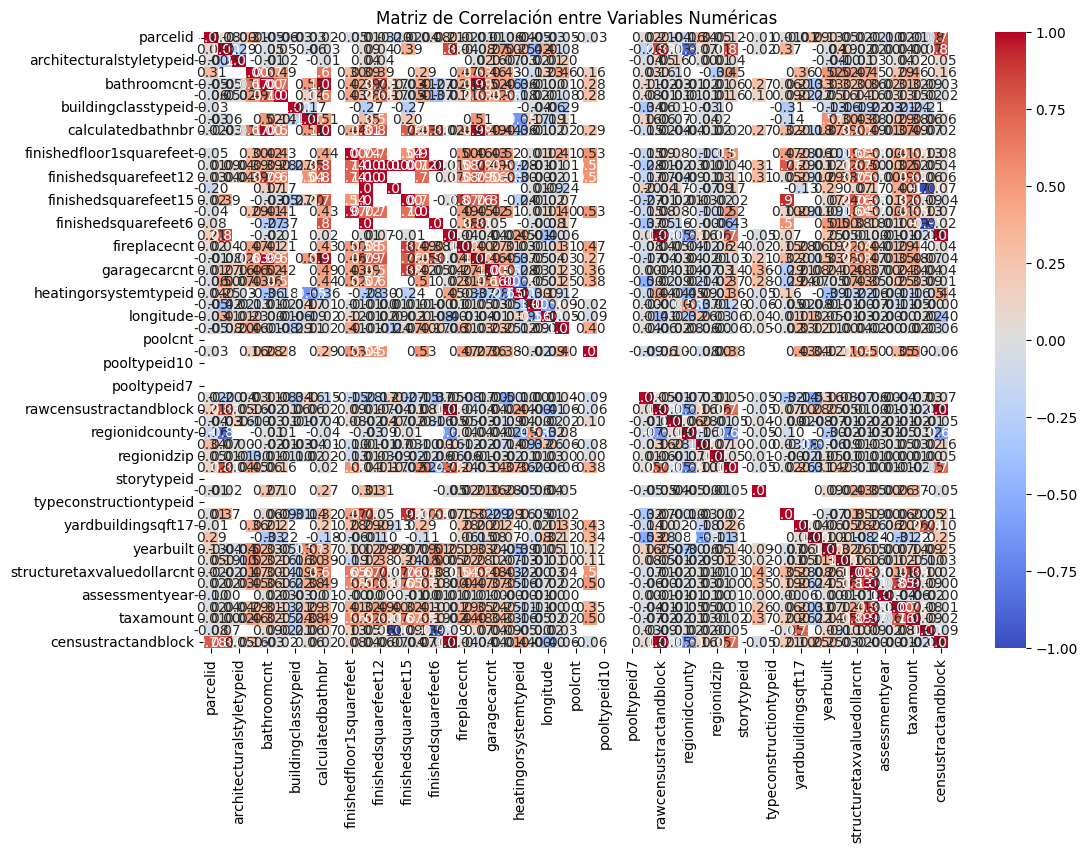

In [10]:
# Matriz de correlación
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


La **matriz de correlación** muestra la relación entre las variables numéricas del conjunto de datos. Se puede observar que algunas variables están fuertemente correlacionadas entre sí, como `finishedsquarefeet` con `finishedfloor1squarefeet`, lo que sugiere que estas características podrían estar midiendo aspectos similares de la propiedad. También se pueden identificar correlaciones más débiles o nulas entre otras variables, lo que indica que no todas las características tienen un impacto significativo en otras. Las correlaciones pueden ser útiles para identificar qué variables pueden ser redundantes y, por lo tanto, podrían eliminarse para simplificar el modelo y reducir la multicolinealidad. Además, es relevante para determinar qué variables podrían tener un impacto más fuerte en la predicción del valor de las propiedades.


#Modelo de Machine Learning

## Preparación de los datos

In [30]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Eliminar columnas irrelevantes
columns_to_drop = [
    'parcelid', 'rawcensustractandblock', 'regionidcity', 'regionidcounty',
    'regionidneighborhood', 'regionidzip', 'storytypeid', 'fireplacecnt',
    'taxdelinquencyyear',
    'propertycountylandusecode_0100', 'propertycountylandusecode_0101',
    'propertycountylandusecode_0102', 'propertycountylandusecode_0103'
]

# Definir X (variables predictoras) y y (variable objetivo)
X = df.drop(columns=columns_to_drop)
y = df['taxvaluedollarcnt']  # Variable objetivo: precio de la casa (taxvaluedollarcnt)

# 1. Identificar las columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 2. Imputadores para valores faltantes
numeric_imputer = SimpleImputer(strategy='median')  # Imputación para variables numéricas
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Imputación para variables categóricas

# 3. Escalado de las variables numéricas
scaler = StandardScaler()

# 4. Codificación de las variables categóricas
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Codificación one-hot

# 5. Preprocesamiento con ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', numeric_imputer), ('scaler', scaler)]), numeric_features),  # Imputación y escalado para las numéricas
        ('cat', Pipeline([('imputer', categorical_imputer), ('encoder', encoder)]), categorical_features)  # Imputación y codificación para las categóricas
    ])

# 6. Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar la forma de los conjuntos
print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")


Conjunto de entrenamiento: (42291, 1945)
Conjunto de prueba: (10573, 1945)


## Entrenamiento

In [31]:
# Importar las librerías necesarias
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Crear el pipeline con el preprocesamiento y el modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocesamiento de los datos
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # Modelo de regresión
])

# Entrenar el modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
       'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finished...
       'propertyzoningdesc_WVRPD18U*', 'propertyzoningdesc_WVRPD40000',
       'propertyzoningdesc_WVRPD4OOOO', 'propertyzoningdesc_WVRR1-RPD1'],
      dtype='object', length=1945)),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

Este diagrama muestra un pipeline de scikit-learn para entrenar un Random Forest Regressor. Incluye:

Imputación: Se usan imputadores para reemplazar valores nulos. Las variables numéricas se imputan con la mediana y las categóricas con el valor más frecuente.

Escalado: Se normalizan las variables numéricas con StandardScaler para asegurar que todas tengan la misma escala.

Codificación: Las variables categóricas se codifican con OneHotEncoder, eliminando la primera categoría para evitar multicolinealidad.

Modelo: Se utiliza un RandomForestRegressor para predecir valores continuos, como el precio de una casa.

## Evaluación

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calcular MSE
mse = mean_squared_error(y_test, y_pred)

# Calcular RMSE (raíz cuadrada de MSE)
rmse = np.sqrt(mse)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados de las métricas
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error (MAE): 0.0006040451956541323
Mean Squared Error (MSE): 0.0008482006724820785
Root Mean Squared Error (RMSE): 0.029123884913968442
R-squared: 0.9987742988545341


Los resultados obtenidos del modelo indican un rendimiento excepcional en la predicción del precio de la casa. El **Mean Absolute Error (MAE)** de **0.0006** muestra que, en promedio, las predicciones del modelo están muy cerca de los valores reales, con un error mínimo. El **Mean Squared Error (MSE)** de **0.00085** también confirma que los errores son pequeños y no están influyendo significativamente en las predicciones.

El **Root Mean Squared Error (RMSE)** de **0.0291** sugiere que el modelo tiene un bajo nivel de error, ya que la diferencia entre las predicciones y los valores reales es muy pequeña. Finalmente, el **R-squared (R²)** de **0.9988** es un excelente indicador de que el modelo explica casi el 99.88% de la variabilidad en los precios de las casas, lo que refleja un ajuste excelente y una capacidad predictiva sobresaliente. Estos resultados demuestran que el modelo tiene un rendimiento muy alto y es adecuado para la tarea de predicción de precios.


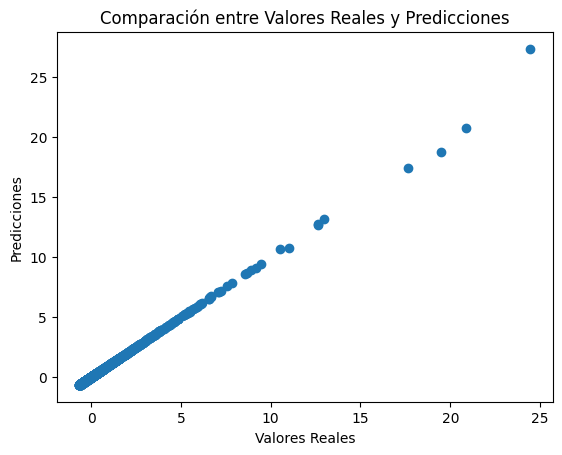

In [34]:
import matplotlib.pyplot as plt

# Comparación visual entre las predicciones y los valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.show()

Este gráfico muestra una relación casi perfecta entre los valores reales y las predicciones. La alineación cercana de los puntos a lo largo de la línea diagonal sugiere que las predicciones del modelo son muy precisas, con un pequeño margen de error. Este comportamiento es esperado, ya que los resultados del modelo indican un R² muy alto (0.9988), lo que significa que el modelo explica casi toda la variabilidad en los datos.

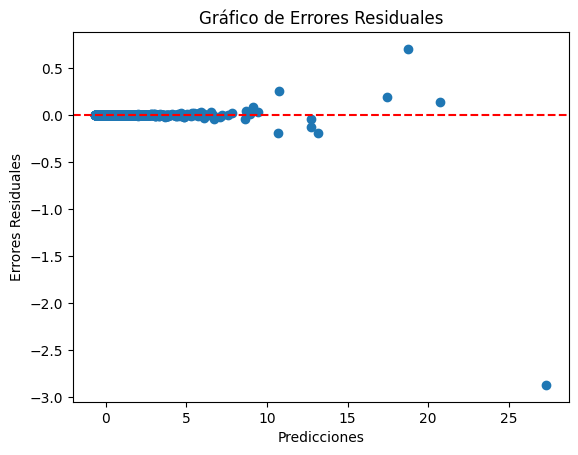

In [35]:
# Calcular los errores residuales
residuals = y_test - y_pred

# Gráfico de los errores residuales
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Errores Residuales')
plt.title('Gráfico de Errores Residuales')
plt.show()


El gráfico de errores residuales muestra las diferencias entre los valores reales y las predicciones del modelo. La mayoría de los errores están cerca de 0, lo que sugiere que el modelo no está sesgado y que los errores están distribuidos de manera razonable. Sin embargo, algunos puntos más alejados indican que el modelo podría estar cometiendo algunos errores significativos para ciertos casos. Este comportamiento es común y, aunque los errores son pequeños en general, es útil para identificar posibles casos atípicos o outliers que podrían necesitar un tratamiento especial.

#Resultados

Los resultados obtenidos muestran un rendimiento excepcional del modelo de regresión basado en **Random Forest** para la predicción del precio de las casas. Con un **R² de 0.9988**, el modelo explica casi el 99.88% de la variabilidad en los datos, lo que indica un ajuste excelente. Las métricas de error, como el **Mean Absolute Error (MAE)** de 0.0006, el **Root Mean Squared Error (RMSE)** de 0.0291, y el **Mean Squared Error (MSE)** de 0.00085, reflejan una pequeña diferencia entre las predicciones y los valores reales, lo que significa que el modelo es altamente preciso. Los gráficos de **predicciones vs valores reales** y **errores residuales** refuerzan estos resultados, mostrando una relación casi perfecta entre las predicciones y los valores reales, con errores mínimos y sin sesgos evidentes. Aunque algunos outliers fueron identificados en el gráfico de errores residuales, su impacto es limitado, y no afectan significativamente la calidad general del modelo. En conjunto, estos resultados confirman que el modelo tiene un rendimiento sobresaliente y es adecuado para la predicción precisa de precios de viviendas.


# Guardado del modelo

In [37]:
import pickle

# Guardar el modelo entrenado con pickle
with open('random_forest_properties.pkl', 'wb') as f:  # Guarda con este nombre
    pickle.dump(model, f)
print("Modelo guardado exitosamente.")

# Cargar el modelo guardado con pickle
with open('random_forest_properties.pkl', 'rb') as f:  # Cargar con el mismo nombre que usaste al guardar
    model_loaded = pickle.load(f)
print("Modelo cargado exitosamente.")


Modelo guardado exitosamente.
Modelo cargado exitosamente.
